# Example 1: The `mm2SANS` `Sample` class

This example describes the initialisation of a `Sample` object,  in this case a single spherical Fe magnetic particle magnetised along $x$.

In [1]:
import mm2SANS
import numpy as np

In [12]:
""" structural properties """

# list of position vectors, in units of meter
R_veclist = [[0, 0, 0]]

# scalar or list of scatterer radius
# if not explicitly provided: 
    # pairwise distances will be calculated.
    # if less than three scatterers are given, a standard radius of 2 nm is set
radius = 10e-9

# volume correction

# structural scattering length density (SLD), best looked up using the package periodictable
# https://periodictable.readthedocs.io/en/latest/api/nsf.html
# SLD value for iron at 7.874 g/cm^3 and 8 Angstrom neutron wavelength
sld_material = (8.024-0.001j) # in 1e6 Angstrom^{-2}

""" magnetic properties """

# specify magnetic moments: 
    # None (non-magnetic sample), single 3-vector (uniform magnetisation) or list of vectors
# micromagnetic simulations usually 
M_veclist = [[1, 0, 0]]

# saturation magnetisation, to calculate the moment of each volume in multiples of mu_Bohr
# set to 1 if the 
M_sat = 800e3 # in A/m

""" periodic repetitions of the structure """

# periodicity of structure, in m
periodicity = (50e-9, 50e-9, 50e-9)

In [13]:
""" create Sample object """

Sample = mm2SANS.Sample(
    # neccessary properties
    positions=R_veclist,
    # optional properties
    moments=M_veclist,
    scattering_length_density=sld_material,
    saturation_magnetisation=M_sat,
    voxel_volumes= 4/3 * np.pi * radius**3 ,
    periodicity=periodicity,
    # additional settings
    volume_correction=None, # None or provide filling factor or provide net volume
    number_of_unit_cells=1,
    print_diagnostics=True,
    )

Data bounding box size: (0.0, 0.0, 0.0) nm.
REMARK: Voxel volumes were not corrected.
1 positions with an average sphere diameter of 20.00 nm, and an average moment of 1.2e+05 mu_Bohr.


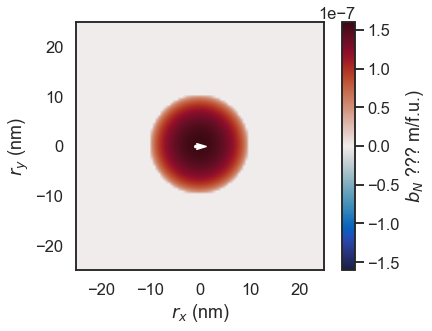

In [14]:
""" plot the projected scattering length density in real space"""

# the step size determines the pixel resolution of the image (in m)
Sample.plot_scattering_length(plane='xy', step_size=0.5e-9, show_magnetic=True)

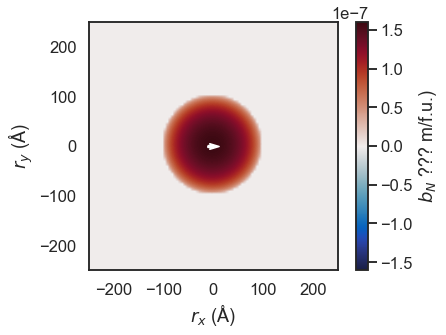

In [15]:
# same, but with base unit in Angstrom
Sample.plot_scattering_length(plane='xy', step_size=0.5e-9, show_magnetic=True, r_unit='Angstrom')